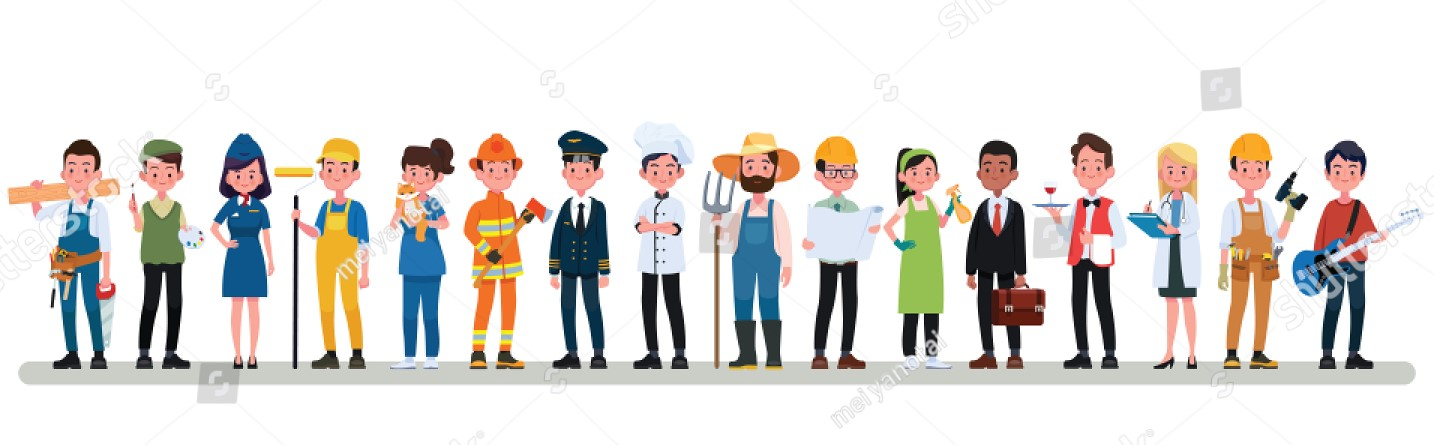

# Giới thiệu


---

Mục tiêu của Notebook là phân tích và so sánh thông tin về quy mô, cơ cấu, xu hướng của lực lượng lao động, tỷ lệ việc làm và thất nghiệp theo các vùng và nhóm tuổi khác nhau.
Từ đó sẽ có cái nhìn toàn diện về thực trạng và xu hướng của thị trường lao động, từ đó hỗ trợ việc hoạch định các chính sách, chiến lược và giải pháp quản lý nguồn nhân lực hiệu quả.

Nội dung Notebook gồm 5 phần sau:
1. Khám phá Dataset về lực lượng lao động và thị trường việc làm tại Việt Nam từ 2020 đến 2023
2. Lực lượng lao động
3. Điều kiện làm việc và chất lượng công việc
4. Lao động có việc làm và thất nghiệp
5. Kết luận

# 1. Khám phá Dataset về lực lượng lao động và thị trường việc làm tại Việt Nam từ 2020 đến 2023
Bảng dữ liệu tổng cộng 53 hàng, mỗi hàng tương ứng với cả nước, khu vực thành thị, nông thôn, 6 vùng địa lý và độ tuổi lao động từ năm 2020 đến 2023, 8 cột tương ứng với các thuộc tính sau:     
- Name: Tên của vùng hoặc nhóm tuổi
- Workforce: Lực lượng lao động
- Workforce freelance and family: Lực lượng lao động tự làm và lao động gia đình
- Workforce in non-agriculture, forestry, and aquaculture: Lực lượng lao động làm công ăn lương trong lĩnh vực phi nông, lâm nghiệp và thủy sản
- Employed: Lực lượng lao động có việc làm.
- Unemployed: Lực lượng lao động thất nghiệp
- Year: Từ năm 2020 đến 2023


Dữ liệu được tổng hợp và công bố bởi Tổng cục Thống kê Việt Nam, cập nhật đến năm 2023. Chi tiết xem các thống kê dưới đây.

In [1]:
# load thư viện
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [7]:
# Load dữ liệu từ file CSV
workforce = pd.read_csv('workforce.csv')
workforce.head(53)

,Name,Workforce,Workforce freelance and family,Workforce in non agriculture forestry aquaculture,Employed,Unemployed,year
0,Ca nuoc,54843,26200,24108,53609,1234,2020
1,Thanh thi,18172,5894,10602,17519,653,2020
2,Nong thon,36671,20306,13507,36090,581,2020
3,Dong bang song Hong,12182,4961,6567,11884,298,2020
4,Trung du va mien nui phia Bac,7666,4995,2415,7514,152,2020
5,Bac Trung Bo va Duyen hai mien Trung,11557,5902,4483,11396,161,2020
6,Tay Nguyen,3457,2401,585,3393,64,2020
7,Dong Nam Bo,10082,2745,6401,9716,366,2020
8,Dong bang song Cuu Long,9899,5196,3659,9706,193,2020
9,15 - 24 tuoi,5724,2030,3322,5287,437,2020


In [4]:
workforce.describe()

,Workforce,Workforce freelance and family,Workforce in non agriculture forestry aquaculture,Employed,Unemployed,year
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,16114.346154,7297.769231,7733.884615,15733.634615,377.500000,2021.500000
std,14980.187072,6785.212085,7469.515909,14684.212233,336.412649,1.128942
min,3289.000000,1471.000000,571.000000,3205.000000,16.000000,2020.000000
25%,5685.750000,2853.750000,2388.500000,5319.250000,133.250000,2020.750000
50%,10122.500000,4483.000000,4686.500000,9780.500000,268.500000,2021.500000
75%,19293.000000,6304.250000,11737.500000,18789.000000,576.500000,2022.250000
max,54843.000000,26200.000000,26785.000000,53609.000000,1488.000000,2023.000000


In [5]:
workforce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Name                                               52 non-null     object
 1   Workforce                                          52 non-null     int64 
 2   Workforce freelance and family                     52 non-null     int64 
 3   Workforce in non agriculture forestry aquaculture  52 non-null     int64 
 4   Employed                                           52 non-null     int64 
 5   Unemployed                                         52 non-null     int64 
 6   year                                               52 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.0+ KB


# 2. Lực lượng lao động

## 2.1. Quy mô và phân bố lực lượng lao động

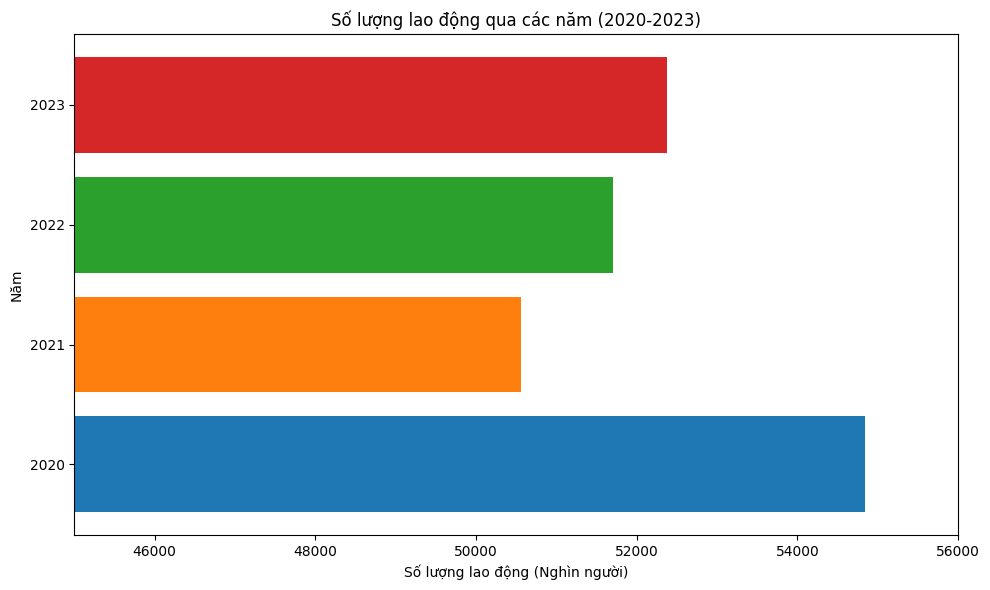

In [15]:
# Chọn dữ liệu cho các năm 2020, 2021, 2022 và 2023
years = [2020, 2021, 2022, 2023]

# Lọc dữ liệu cho các năm này
data_selected = workforce[workforce['year'].isin(years)]
# Tạo subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ cột ngang
for year in years:
    workforce_year = data_selected[data_selected['year'] == year]
    ax.barh(workforce_year['year'], workforce_year['Workforce'], label=str(year))

# Đặt nhãn và tiêu đề
ax.set_xlabel('Số lượng lao động (Nghìn người)')
ax.set_ylabel('Năm')
ax.set_yticks(years)
ax.set_title('Số lượng lao động qua các năm (2020-2023)')
ax.set_xlim(45000, 56000)
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Lực lượng lao động trung bình cả nước giảm mạnh trong giai đoạn 2020 - 2021 từ 5,48 triệu người xuống 5,05 triệu người.

Tuy nhiên sau đó từ năm 2021 - 2023 đã quay trở lại theo xu hướng tăng nhẹ:
- Lực lượng lao động từ 15 tuổi trở lên năm 2022 là 51,7 triệu người, tăng 1,2
triệu người so với năm 2021.
- Lực lượng lao động từ 15 tuổi trở lên năm 2023 đạt 52,4 triệu người, cao hơn 666,5 nghìn người so với năm 2022.

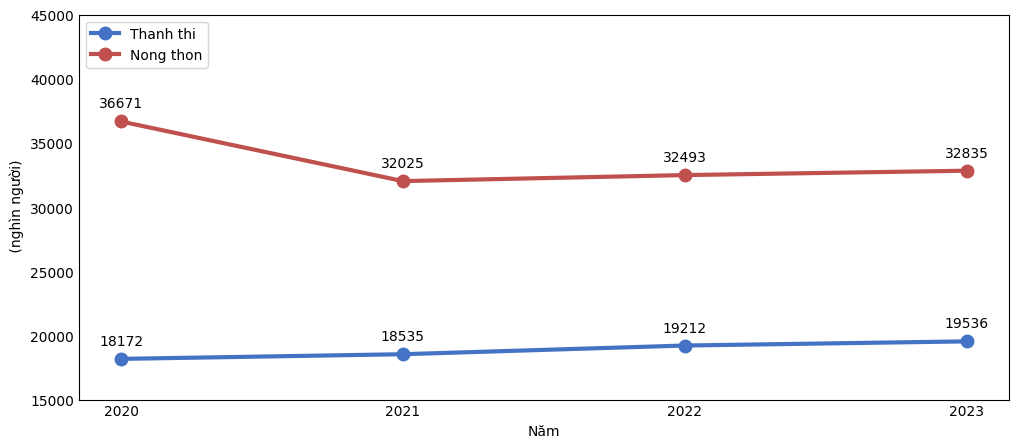

In [16]:
# Select the relevant columns and rows
cols = ['Name', 'Workforce', 'year']
relevant_years = [2020, 2021, 2022, 2023]
data = workforce[workforce['year'].isin(relevant_years)][cols]

# Pivot the data to create a wide-format DataFrame
pivot_data = data.pivot(index='year', columns='Name', values='Workforce')

# Create the line chart
fig, ax = plt.subplots(figsize=(12, 5))
pivot_data['Thanh thi'].plot(ax=ax, color='#4472C4', label='Thanh thi', linewidth=3, marker='o', markersize=9)
pivot_data['Nong thon'].plot(ax=ax, color='#C0504D', label='Nong thon', linewidth=3, marker='o', markersize=9)
ax.set_title('')
ax.set_xlabel('Năm')
ax.set_ylabel(' (nghìn người)')
plt.legend(loc='upper left')
plt.xticks(pivot_data.index)
plt.tick_params(axis='both', which='both', length=0)  # Remove tick marks
ax.set_ylim(15000, 45000)

# Thêm giá trị thu nhập lên đường của biểu đồ
for _, row in pivot_data.iterrows():
    for col in ['Thanh thi', 'Nong thon']:
        ax.annotate(f"{row[col]}", (row.name, row[col]), textcoords="offset points", xytext=(0,10), ha='center', color='black')

plt.show()

Lực lượng lao động ở khu vực thành thị tăng từ 18,2 triệu người lên 19,5 triệu người, chiếm 37,3%, khu vực nông thôn giảm từ 36,7 triệu người còn 32,02 triệu người giai đoạn 2020 - 2021, sau đó có xu hướng tăng nhẹ lên 32,8 triệu người năm 2023, chiếm 62,7%.

Mặc dù có sự tăng lên về tỷ trọng lực lượng lao động ở khu vực thành thị trong
những năm gần đây, nhưng vẫn còn trên 60% lực lượng lao động nước ta tập trung ở khu vực nông thôn.


## 2.2. Đặc trưng của lực lượng lao động

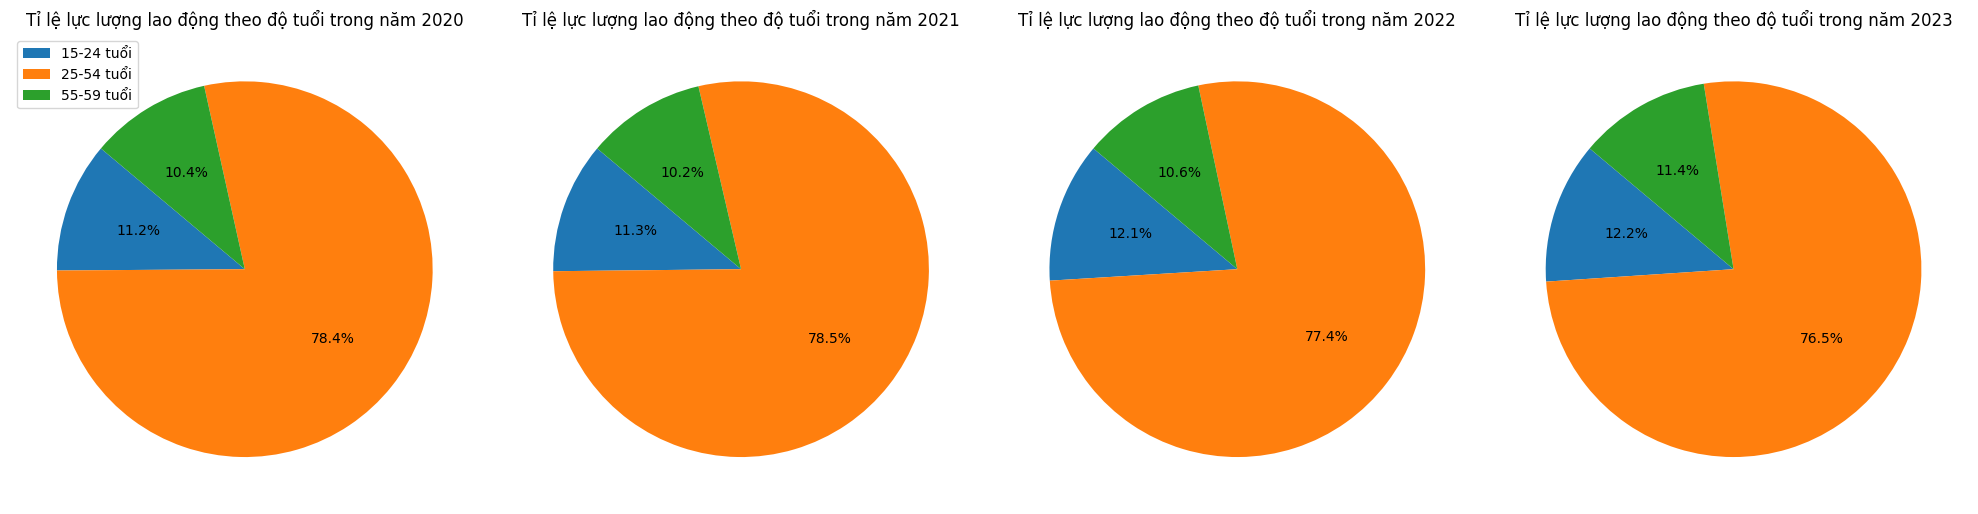

In [17]:
# Tạo các subplot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Lấy labels từ dữ liệu của một năm bất kỳ
labels = workforce[(workforce['Name'].str.contains('tuoi')) & (workforce['year'] == 2020)]['Name']

# Duyệt qua từng năm và vẽ biểu đồ tròn cho tỉ lệ thất nghiệp theo độ tuổi
for i, year in enumerate([2020, 2021, 2022, 2023]):
    # Lọc dữ liệu cho năm cụ thể
    workforce_data_year = workforce[(workforce['Name'].str.contains('tuoi')) & (workforce['year'] == year)]
    workforce_year = workforce_data_year.set_index('Name')['Workforce']

    # Vẽ biểu đồ tròn cho tỉ lệ thất nghiệp theo độ tuổi
    axes[i].pie(workforce_year, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Tỉ lệ lực lượng lao động theo độ tuổi trong năm {year}')

# Thêm nhãn chung dưới cùng
# Thêm chú thích cho các nhóm độ tuổi
legend_labels = ['15-24 tuổi', '25-54 tuổi', '55-59 tuổi', '60 trở lên']
axes[0].legend(legend_labels, loc='upper left')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Lực lượng lao động tương đối trẻ, chủ yếu tập trung vào nhóm tuổi 25-54, chiếm khoảng 75-80% tổng lực lượng lao động và có xu hướng tăng lên qua các năm. Đây là nguồn lực lao động chủ lực, có năng lực và kinh nghiệm để đóng góp vào sự phát triển kinh tế.

Nhóm lao động 15-24 tuổi và nhóm 55-59 tuổi chiếm tỷ lệ thấp hơn, chiếm khoảng 10-12%. Đây là nhóm lao động trẻ vừa gia nhập thị trường lao động và nhóm sắp về hưu, có vai trò quan trọng và quy mô tương đối ổn định.

Nhóm lớn tuổi nhất, 60 tuổi trở lên có tỷ lệ nhỏ nhất, chỉ khoảng 4-5% lực lượng lao động, cho thấy họ đã dần rời khỏi thị trường lao động. Việc quan tâm đến chăm sóc, bảo vệ và hỗ trợ nhóm này sẽ trở nên ngày càng quan trọng.


#3. Điều kiện làm việc và chất lượng công việc

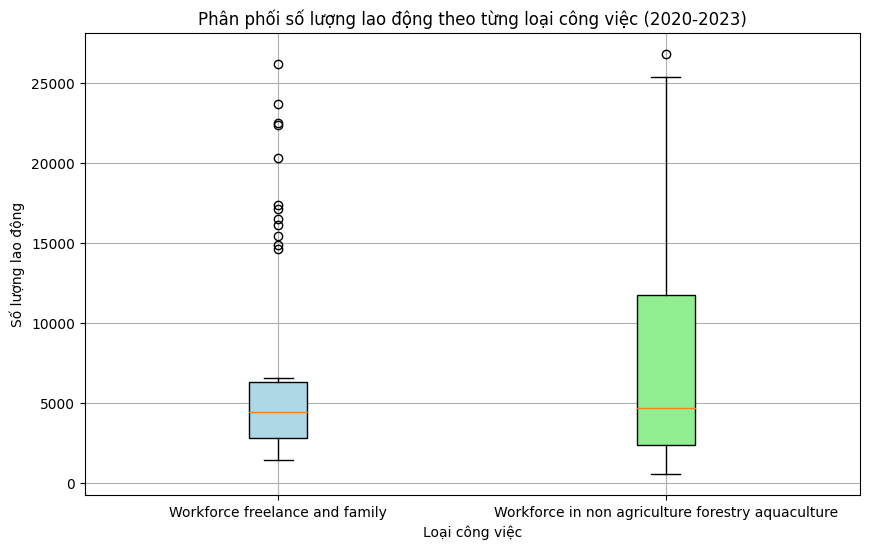

In [19]:
# Chọn các năm từ 2020 đến 2023
years = [2020, 2021, 2022, 2023]
data_selected_years = workforce[workforce['year'].isin(years)]

# Tạo biểu đồ Boxplot
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ Boxplot với màu sắc
box = plt.boxplot([data_selected_years['Workforce freelance and family'],
                   data_selected_years['Workforce in non agriculture forestry aquaculture']],
                  labels=['Workforce freelance and family', 'Workforce in non agriculture forestry aquaculture'],
                  patch_artist=True)
# Đặt màu sắc cho các hộp
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('Loại công việc')
plt.ylabel('Số lượng lao động')
plt.title('Phân phối số lượng lao động theo từng loại công việc (2020-2023)')
plt.grid(True)
plt.show()


Lao động trong các ngành phi nông, lâm, ngư nghiệp có phân bố rộng hơn, thể hiện sự biến động lớn hơn so với phân phối số lượng lao động tự do và gia đình. Điều này cho thấy số lượng trong các ngành phi nông, lâm, ngư nghiệp biến động nhiều hơn giữa các vùng miền và các thời kỳ, trong khi số lượng lao động tự do và gia đình tương đối ổn định hơn.

Sự xuất hiện của một số giá trị ngoại lai (các điểm trên các hộp) trong cả hai phân phối cho thấy có một số vùng miền hoặc thời kỳ có giá trị đáng kể cao hơn so với xu hướng chung.

Nhìn chung, số lượng lao động tự do và gia đình và số lượng lao động trong ngành phi nông, lâm, ngư nghiệp có mối tương quan tích cực. Khi số lượng lao động tự do và gia đình tăng, thì số lượng lao động trong ngành phi nông, lâm, ngư nghiệp cũng tăng

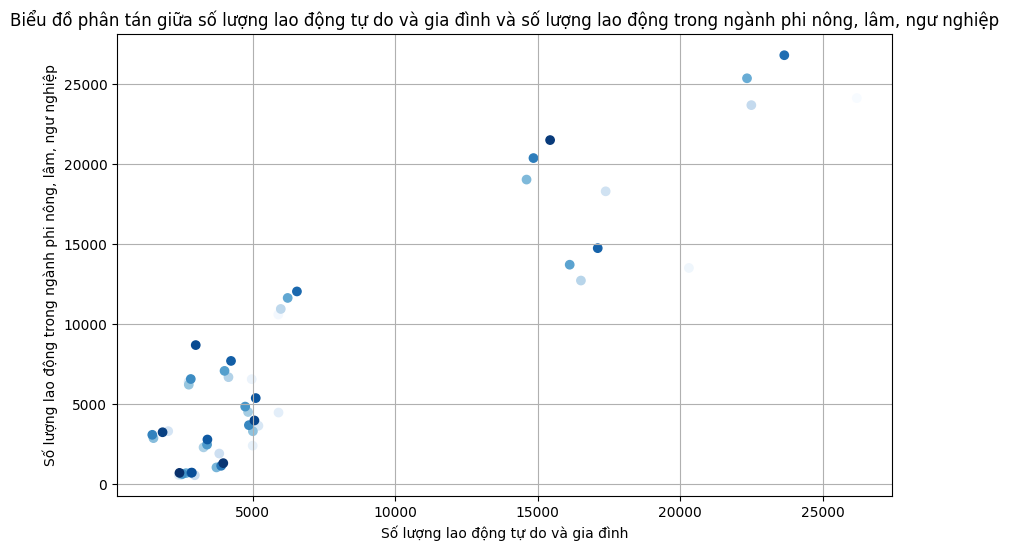

In [20]:
# Tách các cột tương ứng với số lượng lao động tự do và gia đình, cũng như số lượng lao động trong ngành phi nông, lâm, ngư nghiệp
workforce_freelance_family = workforce['Workforce freelance and family']
workforce_non_agri_forest_aqua = workforce['Workforce in non agriculture forestry aquaculture']

# Tạo một dãy màu sắc từ màu cơ sở
base_color = 'blue'
num_points = len(workforce_freelance_family)
colors = np.linspace(0, 1, num_points)  # Tạo một dãy các số từ 0 đến 1
colors = [plt.cm.Blues(color) for color in colors]  # Chuyển đổi các số thành màu sắc

# Vẽ biểu đồ phân tán với màu sắc khác nhau cho mỗi điểm dữ liệu
plt.figure(figsize=(10, 6))
plt.scatter(workforce_freelance_family, workforce_non_agri_forest_aqua, c=colors)
plt.title('Biểu đồ phân tán giữa số lượng lao động tự do và gia đình và số lượng lao động trong ngành phi nông, lâm, ngư nghiệp')
plt.xlabel('Số lượng lao động tự do và gia đình')
plt.ylabel('Số lượng lao động trong ngành phi nông, lâm, ngư nghiệp')
plt.grid(True)
plt.show()

Các điểm dữ liệu được phân tán khá ngẫu nhiên trên mặt phẳng, có phân khối khá rộng chứ không tập trung thành một mẫu rõ ràng. Có thể thấy rằng có sự biến động lớn về số lượng lao động giữa các vùng miền và các năm khác nhau

#4. Lao động có việc làm và thất nghiệp

##4.1. Lao động có việc làm

Năm 2020 và 2021 là thời kì chịu tác động nặng nề bởi dịch, số lao động có việc làm năm 2021 giảm 1.0 triệu người so với năm 2020.
Đến giai đoạn năm 2022-2023 là giai đoạn phục hồi, số lao động tăng ở tất cả các quý do hiện tượng “tăng bù” sau đại dịch Covid-19.

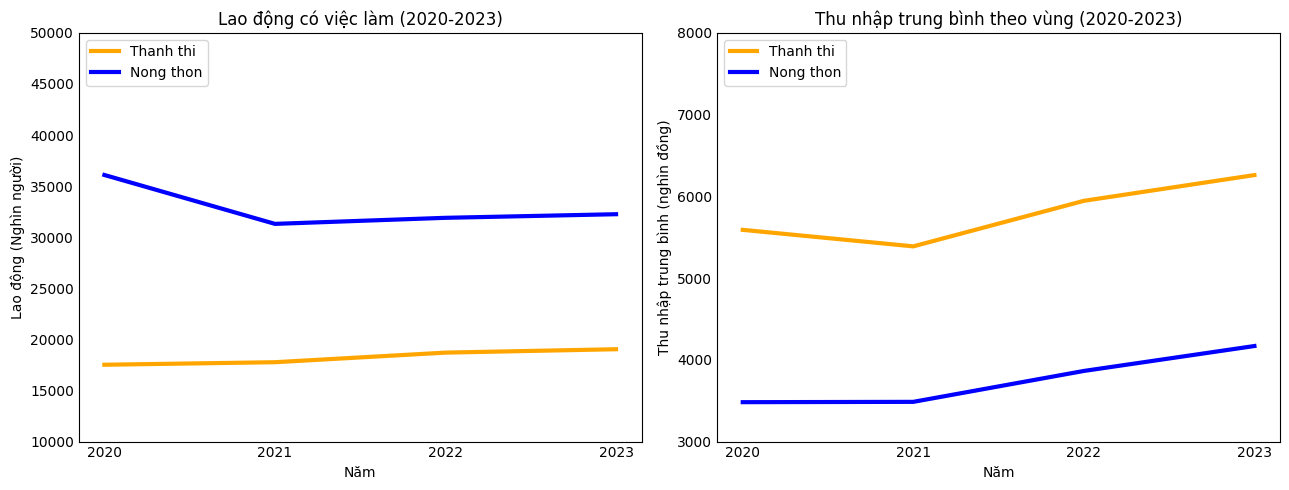

In [22]:
income = pd.read_csv('average_income.csv')

cols = ['Name', 'Total average income', 'year']
colst = ['Name', 'Employed', 'year']
relevant_years = [2020, 2021, 2022, 2023]
data = income[income['year'].isin(relevant_years)][cols]
datat = workforce[workforce['year'].isin(relevant_years)][colst]

pivot_data = data.pivot(index='year', columns='Name', values='Total average income')
pivot_datat = datat.pivot(index='year', columns='Name', values='Employed')
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(13, 5))

pivot_data.index = pivot_data.index.astype(int)
pivot_datat.index = pivot_datat.index.astype(int)

pivot_data['Thanh thi'].plot(ax=ax1, color='orange', label='Thanh thi', linewidth=3)
pivot_data['Nong thon'].plot(ax=ax1, color='blue', label='Nong thon', linewidth=3)
ax1.set_title('Thu nhập trung bình theo vùng (2020-2023)')
ax1.set_xlabel('Năm')
ax1.set_ylabel('Thu nhập trung bình (nghìn đồng)')
ax1.legend(loc='upper left')
ax1.set_xticks(pivot_data.index)
ax1.tick_params(axis='both', which='both', length=0)
ax1.set_ylim(3000, 8000)

pivot_datat['Thanh thi'].plot(ax=ax2, color='orange', label='Thanh thi', linewidth=3)
pivot_datat['Nong thon'].plot(ax=ax2, color='blue', label='Nong thon', linewidth=3)
ax2.set_title('Lao động có việc làm (2020-2023)')
ax2.set_xlabel('Năm')
ax2.set_ylabel('Lao động (Nghìn người)')
ax2.legend(loc='upper left')
ax2.set_xticks(pivot_datat.index)
ax2.tick_params(axis='both', which='both', length=0)
ax2.set_ylim(10000, 50000)
plt.tight_layout()
plt.show()

Mặc dù số lượng lao động có việc làm ở nông thôn cao hơn thành thị tuy nhiên thu nhập bình quân của thành thị lại cao hơn. Có thể thấy rằng:
- Lao động ở nông thôn bị "rút ruột", chủ yếu là lao động trẻ, kỹ năng cao.
- Lao động còn lại ở nông thôn phần lớn là người cao tuổi, kỹ năng thấp, năng suất lao động thấp hơn.
- Trong khi đó, lao động dồn về thành thị tạo ra nguồn cung lao động dồi dào, gây cạnh tranh và giảm áp lực lên mức lương.

Khi có nguồn cung lao động dồi dào ở thành thị do người lao động di cư từ nông thôn lên, điều này sẽ:
- Tạo ra sự cạnh tranh về việc làm giữa các lao động ở thành thị.
- Điều này sẽ hạn chế khả năng đàm phán và đòi hỏi mức lương cao hơn của người lao động.
- Ngược lại, với nguồn cung lao động dồi dào, các doanh nghiệp ở thành thị sẽ có thể dễ dàng tuyển dụng với mức lương không quá cao.

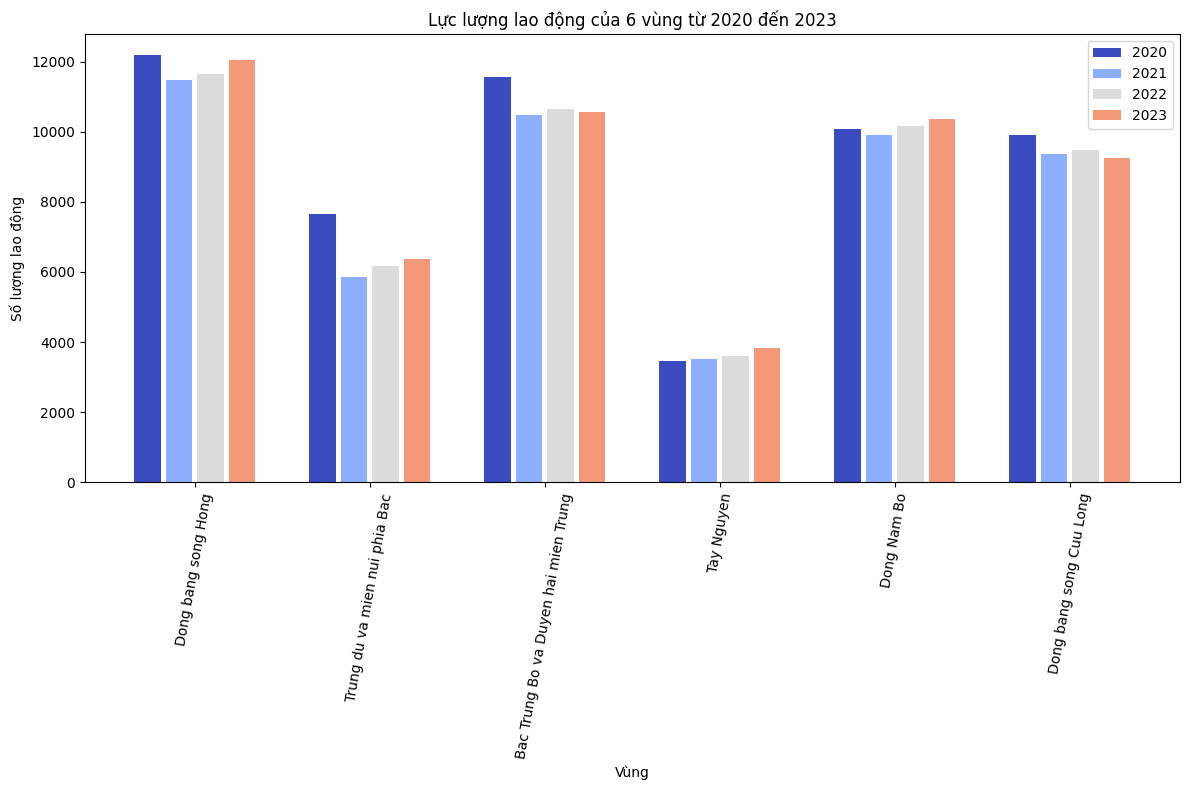

In [23]:
# Lọc dữ liệu cho 6 vùng
regions = ['Dong bang song Hong','Trung du va mien nui phia Bac', 'Bac Trung Bo va Duyen hai mien Trung', 'Tay Nguyen', 'Dong Nam Bo', 'Dong bang song Cuu Long']
data_regions = workforce[workforce['Name'].isin(regions)]

# Tạo biểu đồ cột
num_years = len(workforce['year'].unique())
num_regions = len(regions)
bar_width = 0.15
index = np.arange(num_regions)

# Tính toán khoảng cách giữa các cột trong mỗi vùng
gap = bar_width / (num_years + 1)

plt.figure(figsize=(12, 8))

for i, year in enumerate(sorted(data['year'].unique())):
    plt.bar(index + i * bar_width + i * gap, data_regions[data_regions['year'] == year]['Workforce'], bar_width, label=str(year), color=plt.cm.coolwarm(i / num_years), align='center')

plt.xlabel('Vùng')
plt.ylabel('Số lượng lao động')
plt.title('Lực lượng lao động của 6 vùng từ 2020 đến 2023')
plt.xticks(index + (num_years - 1) * (bar_width + gap) / 2, regions, rotation=80)
plt.legend()
plt.tight_layout()
plt.show()


Ở cấp độ vùng kinh tế - xã hội, trong hai năm diễn ra dịch Covid-19 thì lao động
ở hầu hết các vùng đều có xu hướng giảm, riêng vùng Tây Nguyên dường như ít chịu
ảnh hưởng nhất, trong hai năm 2020 và 2021 vùng này lực lượng lao động có việc làm vẫn tăng lên, trái ngược với xu hướng
chung của cả nước và các vùng khác, năm 2022 vùng này vẫn tăng nhưng tốc độ tăng
chậm lại so với năm 2021, điều này có thể do ảnh hưởng của dòng di cư trong giai
đoạn diễn ra dịch Covid-19.


##4.2. Thất nghiệp

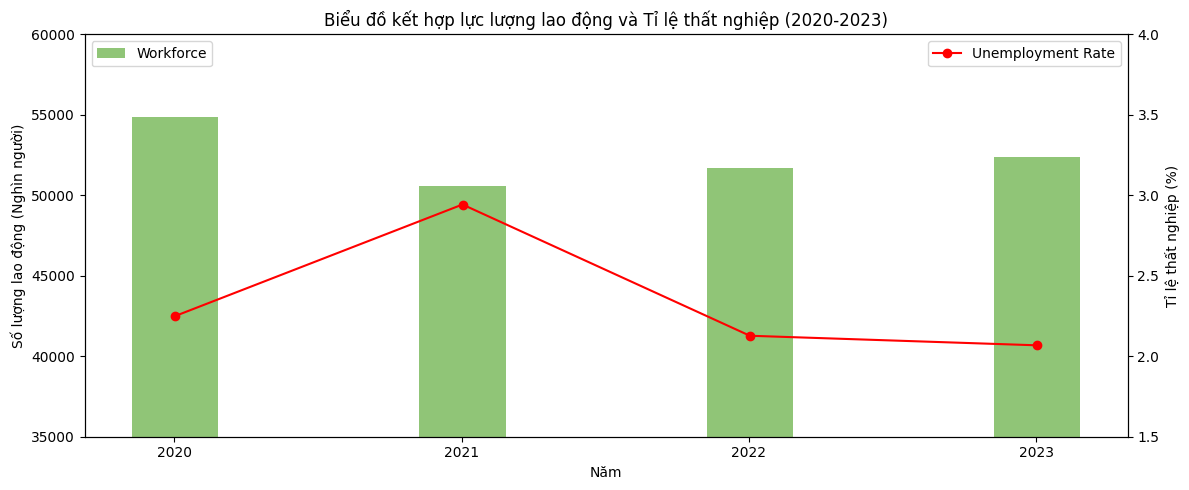

In [24]:
ca_nuoc_workforce = workforce[(workforce['Name'] == 'Ca nuoc') & (workforce['year'].between(2020, 2023))]
fig, ax1 = plt.subplots(figsize=(12, 5))

# Biểu đồ cột
bar_width = 0.3
bars = ax1.bar(ca_nuoc_workforce['year'], ca_nuoc_workforce['Workforce'], width=bar_width, color='#90C577', label='Workforce')

ax2 = ax1.twinx()
unemployment_rate = (ca_nuoc_workforce['Unemployed'] / ca_nuoc_workforce['Workforce']) * 100  # Tính tỉ lệ thất nghiệp (%)
ax2.plot(ca_nuoc_workforce['year'], unemployment_rate, marker='o', color='red', label='Unemployment Rate')

ax1.set_xlabel('Năm')
ax1.set_ylabel('Số lượng lao động (Nghìn người)')
ax2.set_ylabel('Tỉ lệ thất nghiệp (%)')
ax2.set_ylim(1.5, 4)
plt.title('Biểu đồ kết hợp lực lượng lao động và Tỉ lệ thất nghiệp (2020-2023)')

ax1.legend(loc='upper left')
ax1.set_ylim(35000, 60000)
ax2.legend(loc='upper right')
plt.xticks(ca_nuoc_workforce['year'] - bar_width / 100, ca_nuoc_workforce['year'])  # Đặt vị trí và nhãn năm
plt.tight_layout()
plt.show()


Khi lực lượng lao động giảm, tỉ lệ thất nghiệp lại tăng lên, cho thấy có sự tương quan ngược chiều giữa hai yếu tố này.
Có thể thấy rằng, khi nguồn cung lao động giảm thì sẽ dẫn đến gia tăng tỉ lệ thất nghiệp.

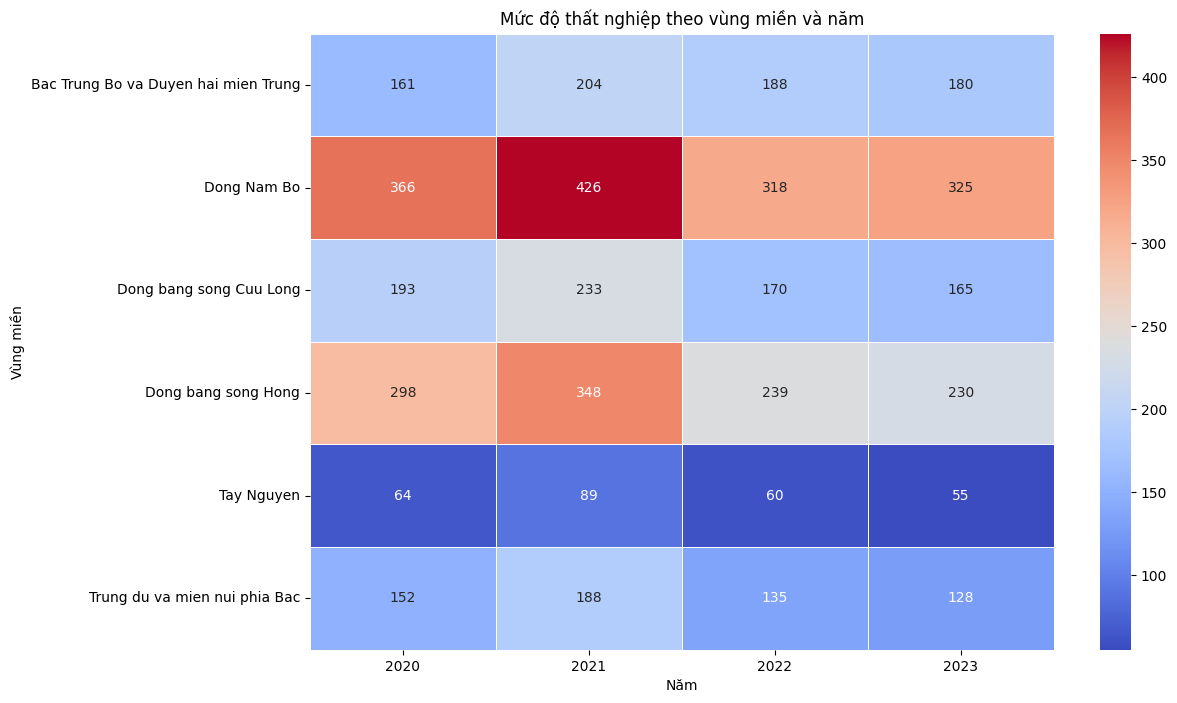

In [25]:
# Lọc dữ liệu cho các vùng miền
regions = [ 'Dong bang song Hong', 'Trung du va mien nui phia Bac', 'Bac Trung Bo va Duyen hai mien Trung', 'Tay Nguyen', 'Dong Nam Bo', 'Dong bang song Cuu Long']
data_regions = workforce[workforce['Name'].isin(regions)]

# Tạo heatmap
plt.figure(figsize=(12, 8))
heatmap_data = data_regions.pivot(index='Name', columns='year', values='Unemployed')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f", linewidths=.5)
plt.title('Mức độ thất nghiệp theo vùng miền và năm')
plt.xlabel('Năm')
plt.ylabel('Vùng miền')
plt.show()


Có thể thấy rằng năm 2021 là năm có tỉ lệ thất nghiệp cao nhất do ảnh hưởng nặng nề của đại dịch COVID-19. Các đợt giãn cách xã hội kéo dài, các hoạt động kinh tế bị gián đoạn, nhiều doanh nghiệp phải thu hẹp hoặc tạm ngừng hoạt động. Điều này dẫn đến việc hàng triệu lao động bị mất việc làm hoặc phải nghỉ việc tạm thời.

# 5. Kết luận

Lực lượng lao động Việt Nam đang có những thay đổi tích cực, với sự gia tăng tổng số lao động, cải thiện tình hình việc làm và xu hướng chuyển dịch cơ cấu sang các ngành phi nông nghiệp

Để cải thiện tình hình thất nghiệp và tăng cường sự ổn định của lực lượng lao động, nhóm đã đưa ra 1 số giải pháp:
- Tập trung phát triển các ngành công nghiệp, dịch vụ để tạo thêm việc làm cho lao động, đặc biệt là ở các khu vực kinh tế trọng điểm.
- Đẩy mạnh đào tạo nghề và nâng cao kỹ năng cho lao động, đặc biệt là lao động trẻ để đáp ứng nhu cầu việc làm mới.
- Khuyến khích lao động chuyển dịch từ khu vực nông nghiệp sang các ngành công nghiệp và dịch vụ, đặc biệt là ở các khu vực kinh tế phát triển.
- Cải thiện chất lượng giáo dục, đặc biệt là đào tạo kỹ năng nghề và kỹ năng mềm cho lao động trẻ.